/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


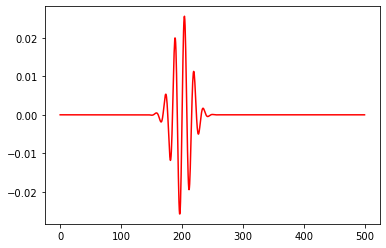

In [1]:
from wpspec import pib
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

params = {'box_length': 500, 'grid_points': 1000,'system': 'pib', 'time_step': 0.5}

pi = pib(params)

pi.x0 = 200
pi.sigma = 15
pi.k0 = 0.4

#pi.sigma = pi.L / 20
#pi.k0 = 2.0
#pi.dt = 0.5
pi.gaussian_wavepacket()

plt.plot(pi.x, pi.Psi, 'red')
plt.show()

#pi.position_eigenfunction(pi.L/3)
#plt.plot(pi.x, pi.Psi, 'red')
#plt.show()

In [2]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
plt.close()


### parameters for plot
ax.set_xlim((0, pi.L))
ax.set_ylim((-0.1, 0.1))

line, = ax.plot([], [], lw=2)
#line1, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    #line1.set_data([], [])
    return (line,)

In [3]:
N_time = pi.simulation_time_steps
pi.sg_dt = 10.0
pi.gaussian_wavepacket()
pi.expand_pib()
# animation function. This is called sequentially  
def animate(i):
    pi.stern_gerlach_pib(i)
    line.set_data(pi.x, pi.Psi)
    return (line,)
  
anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=N_time, interval=100, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Measuring position!
